pip install UpSetPlot


In [26]:
import json
from pathlib import Path
from matplotlib import pyplot as plt
from upsetplot import from_contents, UpSet, plot

folder = Path("lexiques")
lex = [
    # ("Ducange", "ducange"),
    ("GLÀFF", "glaff"),
    ("LGeRM", "LGERM"),
    ("Morphalou", "morphalou"),
    ("TFLi", "tlfi")
]

In [27]:
dico_lex = {}
for name, file in lex:
    for f in folder.glob(f"{file}*.json"):
        dico_lex[name] = set(json.load(f.open(encoding="utf-8")))

In [28]:
test = from_contents(dico_lex)


In [29]:
test

id
GLÀFF LGeRM Morphalou TFLi                   
True  False True      False     pochetronnent
            False     False         recoloués
                      False  recirconscrivais
      True  True      False      couchottions
      False True      False     replaisantent
...                                       ...
False False False     True       disconvenire
                      True         tuberville
                      True           biramica
                      True              cheno
                      True           machacol

[3762103 rows x 1 columns]

In [30]:
test.to_csv("test.csv")

In [31]:
# test

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


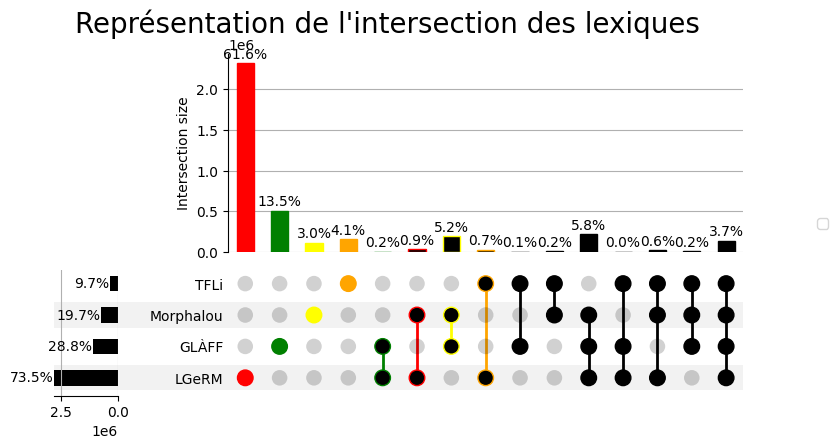

In [36]:
upset = UpSet(
    test,
    # orientation='vertical',
    # sort_by='degree',
    # subset_size='count',
    # show_counts=True,
    # totals_plot_elements=5,
    show_percentages=True
)

# ax_dict.add_catplot(kind='strip', value="id")

# ax_dict.add_stacked_bars(by="id")

upset.style_subsets(
    present="LGeRM",
    absent=[
        # "Ducange",
        "GLÀFF",
        "Morphalou",
        "TFLi"
    ],
    facecolor="red",
    # hatch="\\",
    # label="LGeRM",
)

# upset.style_subsets(
#     present="Ducange",
#     absent=["LGeRM", "GLÀFF", "Morphalou", "TFLi"],
#     facecolor="blue",
#     # hatch="\\",
#     # label="Ducange",
# )

upset.style_subsets(
    present="GLÀFF",
    absent=[
        "LGeRM",
        # "Ducange",
        "Morphalou",
        "TFLi"
    ],
    facecolor="green",
    # hatch="\\",
    # label="GLÀFF",
)

upset.style_subsets(
    present="Morphalou",
    absent=[
        "LGeRM",
        # "Ducange",
        "GLÀFF",
        "TFLi"
    ],
    facecolor="yellow",
    # hatch="\\",
    # label="Morphalou",
)

upset.style_subsets(
    present="TFLi",
    absent=[
        "LGeRM",
        # "Ducange",
        "GLÀFF",
        "Morphalou"
    ],
    facecolor="orange",
    # hatch="\\",
    # label="TFLi",
)

upset.style_subsets(
    present=["LGeRM", "GLÀFF"],
    absent=[
        # "Ducange",
        "Morphalou"
        , "TFLi"
    ],
    edgecolor="green",
    # label="LGeRM & GLÀFF",
)

upset.style_subsets(
    present=["LGeRM", "Morphalou"],
    absent=[
        # "Ducange",
        "GLÀFF",
        "TFLi"
    ],
    edgecolor="red",
    # label="LGeRM & Morphalou",
)

upset.style_subsets(
    present=["GLÀFF", "Morphalou"],
    absent=[
        # "Ducange",
        "LGeRM",
        "TFLi"
    ],
    edgecolor="yellow",
    # label="GLÀFF & Morphalou",
)

upset.style_subsets(
    present=["TFLi", "LGeRM"],
    absent=[
        # "Ducange",
        "GLÀFF",
        "Morphalou"
    ],
    edgecolor="orange",
    # label="TFLi & LGeRM",
)


fig = plt.figure()
fig.legend(loc=7)

upset.plot(fig=fig)
fig.figsize = (20, 20)
plt.suptitle("Représentation de l'intersection des lexiques", fontsize=20)
plt.savefig("upset_WO_ducange.png")
plt.show()

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

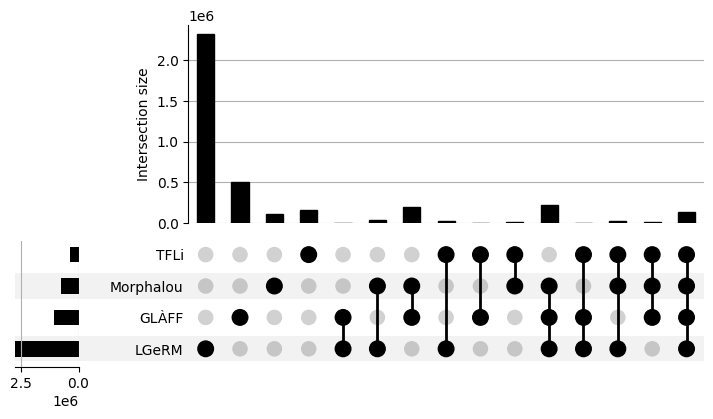

In [33]:
fig = plot(test)

fig



In [34]:
test

id
GLÀFF LGeRM Morphalou TFLi                   
True  False True      False     pochetronnent
            False     False         recoloués
                      False  recirconscrivais
      True  True      False      couchottions
      False True      False     replaisantent
...                                       ...
False False False     True       disconvenire
                      True         tuberville
                      True           biramica
                      True              cheno
                      True           machacol

[3762103 rows x 1 columns]

pip install pandas pydataset rpy2


pip install venn


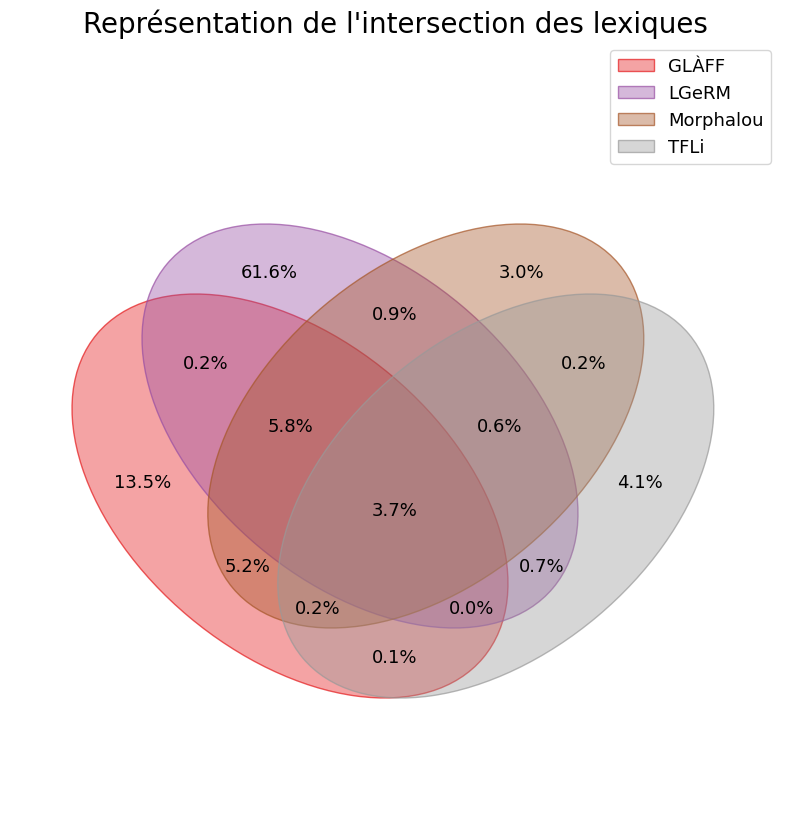

In [35]:
from venn import venn

venn(dico_lex, cmap="Set1", figsize=(10, 10), fmt="{percentage:.1f}%")
plt.title("Représentation de l'intersection des lexiques", fontsize=20)
plt.savefig("venn.png")
plt.show()
